In [23]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

## Knn - Iris

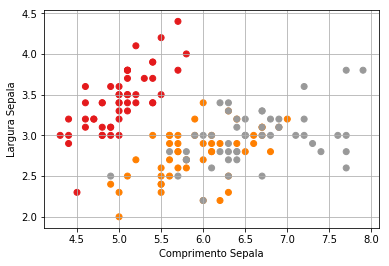

In [2]:
iris = datasets.load_iris()
#Visualiza base de dados
X = iris.data[:, :2] #as duas primeiras características
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

In [3]:
dados = []
for i in range(len(iris['data'])):
    dados.append([list(iris['data'][i]), iris['target'][i]])

In [4]:
import knn

knn = knn.Knn(3)
knn.treina(dados[:40] + dados[51:90] + dados[101:140])

In [5]:
x_predito = numpy.concatenate([iris.data[40:50], iris.data[90:100], iris.data[140:150]])
y_valido = numpy.concatenate([iris.target[40:50], iris.target[90:100], iris.target[140:150]])
x_treino = numpy.concatenate([iris.data[:40], iris.data[51:90], iris.data[101:140]])
y_treino = numpy.concatenate([iris.target[:40], iris.target[51:90], iris.target[101:140]])

In [6]:
#Define o y_predito
aux = (dados[40:50] + dados[90:100] + dados[140:150])
y_predito = []
for i in range(len(aux)):
    y_predito.append(knn.prediz(aux[i]))
print(y_predito)
print(y_valido)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


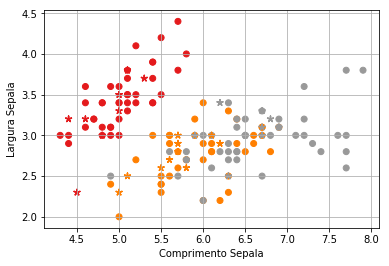

In [7]:
#Visualiza resultado da predição
X = x_treino[:, :2]
plt.scatter(X[:, 0], X[:, 1], c=y_treino, cmap=plt.cm.Set1)
X = x_predito[:, :2]
plt.scatter(X[:, 0], X[:, 1], c=y_predito, marker=(5, 2), cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_valido,y_predito))  
print(classification_report(y_valido,y_predito))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Kmeans - Iris

In [9]:
from kmeans import Kmeans

iris = datasets.load_iris()
kmeans = Kmeans(3)
kmeans.set_elementos(iris.data)
dados_kmeans = kmeans.agrupa(100) #passa quantidade de iterações

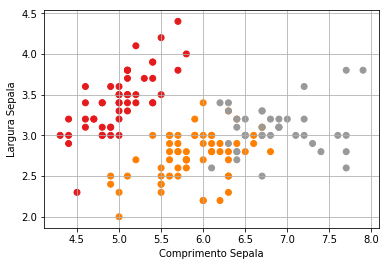

In [10]:
#Visualiza resultado do kmeans
x = []
y = []
grupo = []
for i in range(len(dados_kmeans)):
    #as duas primeiras características
    x.append(dados_kmeans[i][0][0])
    y.append(dados_kmeans[i][0][1])
    grupo.append(dados_kmeans[i][1])
plt.scatter(x, y, c=grupo, cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

## Exploração - Boston

In [17]:
from sklearn.datasets import load_boston
import pandas as pd

dataset = load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston['MEDV'] = dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


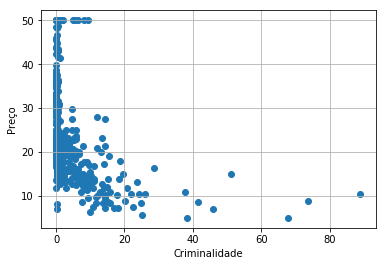

In [38]:
x = boston['CRIM']
y = boston['MEDV']
plt.scatter(x, y, cmap=plt.cm.Set1)
plt.xlabel('Criminalidade')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

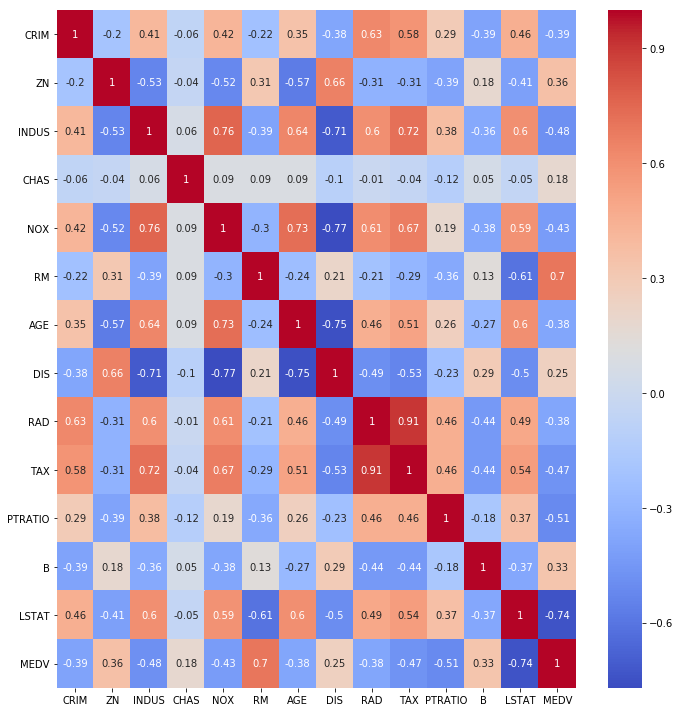

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=boston.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":10})
plt.tight_layout()
plt.show()

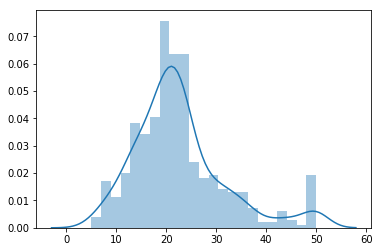

In [30]:
sns.distplot(tuple(boston['MEDV']))

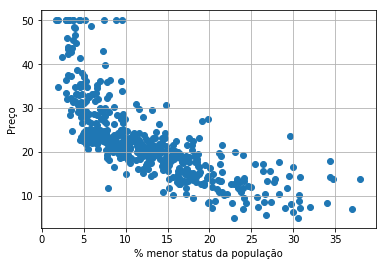

In [43]:
x = boston['LSTAT']
y = boston['MEDV']
plt.scatter(x, y, cmap=plt.cm.Set1)
plt.xlabel('% menor status da população')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

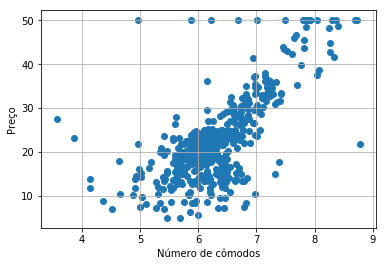

In [47]:
x = boston['RM']
y = boston['MEDV']
plt.scatter(x, y, cmap=plt.cm.Set1)
plt.xlabel('Número de cômodos')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

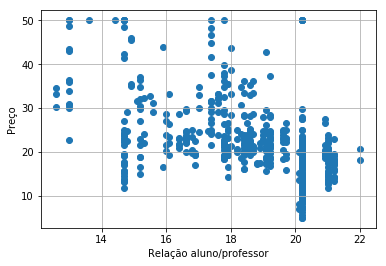

In [48]:
x = boston['PTRATIO']
y = boston['MEDV']
plt.scatter(x, y, cmap=plt.cm.Set1)
plt.xlabel('Relação aluno/professor no bairro')
plt.ylabel('Preço')
plt.grid(True)
plt.show()